In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yashrajyash/Datasets/main/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# lowercase all columns

df.columns = df.columns.str.lower()

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# bmi value gender wise

df.groupby(['gender'])['bmi'].agg(['mean', 'median'])

,mean,median
gender,,
Female,29.065758,27.8
Male,28.647936,28.4
Other,22.400000,22.4


In [ ]:
# df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

# filling all null values with their gender respective median values

df.bmi[df.gender=='Female'] = df.bmi[df.gender=='Female'].fillna(27.8)
df.bmi[df.gender=='Male'] = df.bmi[df.gender=='Male'].fillna(28.4)
df.bmi[df.gender=='Other'] = df.bmi[df.gender=='Other'].fillna(22.4)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 
                    'ever_married', 'work_type', 'residence_type', 
                    'smoking_status', 'stroke']

numerical_cols = ['age', 'avg_glucose_level', 'bmi']

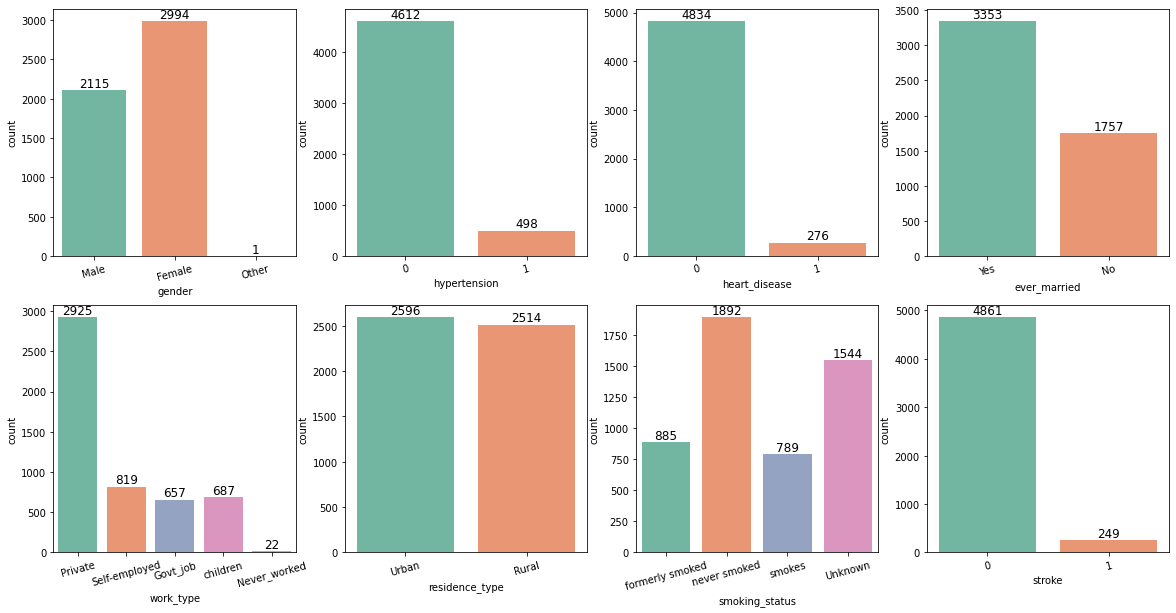

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    g = sns.countplot(data=df, x=col, palette="Set2")
    for rect in g.patches:
        x, y = rect.get_x(), rect.get_y()
        h, w = rect.get_height(), rect.get_width()
        plt.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12, color='k')

    plt.xticks(rotation=15)

plt.show()

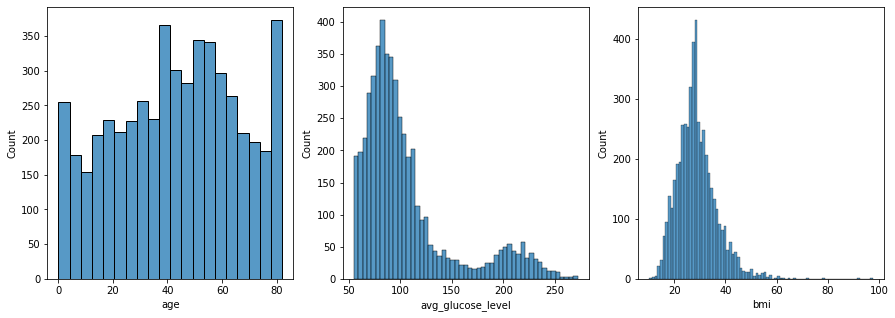

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, palette='Set2')

plt.show()

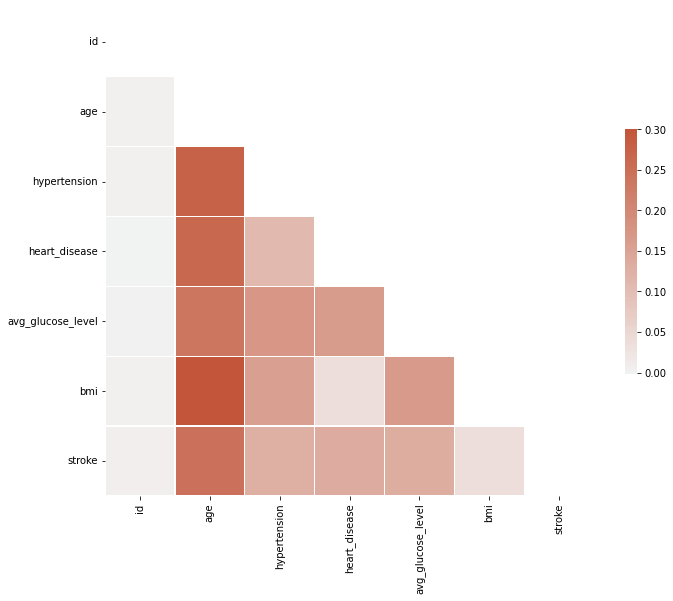

In [ ]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
# since "Other" gender is only one instance in the data so let's drop it

df = df.loc[~(df.gender=="Other")]

In [ ]:
df.shape

(5109, 12)

In [ ]:
## Data mapping

gender_map = {'Female':0, 'Male':1}
ever_married_map = {'Yes':1, 'No':0}
residence_type_map = {'Rural':0, 'Urban':1}

df.gender = df.gender.map(gender_map)
df.ever_married = df.ever_married.map(ever_married_map)
df.residence_type = df.residence_type.map(residence_type_map)

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,27.8,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
6,53882,1,74.0,1,1,1,Private,0,70.09,27.4,never smoked,1
7,10434,0,69.0,0,0,0,Private,1,94.39,22.8,never smoked,1
8,27419,0,59.0,0,0,1,Private,0,76.15,27.8,Unknown,1
9,60491,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1


In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# Removing the observations that have smoking type unknown.
df=df[df['smoking_status']!='Unknown']

In [ ]:
data_dummies = df[['smoking_status','work_type']]
data_dummies = pd.get_dummies(data_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)
data_stroke = df['stroke']
df.drop(columns=['stroke'],inplace=True)
df = df.merge(data_dummies,left_index=True, right_index=True,how='left')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,27.8,0,1,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,0,1,0,0,0,0,1,0


In [ ]:
df.drop(columns=['smoking_status_smokes','work_type_children'],inplace=True)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,0,1,0
1,51676,0,61.0,0,0,1,0,202.21,27.8,0,1,0,0,0,1
2,31112,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,0,0,0,0,1,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,0,1,0,0,0,1


In [ ]:
data_to_scale = df[['age','avg_glucose_level', 'bmi']]

In [ ]:
df.drop(columns=['age','avg_glucose_level', 'bmi'],inplace=True)

In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,residence_type,smoking_status_formerly smoked,smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed
0,9046,1,0,1,1,1,1,0,0,0,1,0
1,51676,0,0,0,1,0,0,1,0,0,0,1
2,31112,1,0,1,1,0,0,1,0,0,1,0
3,60182,0,0,0,1,1,0,0,0,0,1,0
4,1665,0,1,0,1,0,0,1,0,0,0,1


In [ ]:
data_to_scale.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,27.8
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [ ]:
df = df.merge(data_to_scale,left_index=True, right_index=True,how='left')

In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,residence_type,smoking_status_formerly smoked,smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,age,avg_glucose_level,bmi
0,9046,1,0,1,1,1,1,0,0,0,1,0,67.0,228.69,36.6
1,51676,0,0,0,1,0,0,1,0,0,0,1,61.0,202.21,27.8
2,31112,1,0,1,1,0,0,1,0,0,1,0,80.0,105.92,32.5
3,60182,0,0,0,1,1,0,0,0,0,1,0,49.0,171.23,34.4
4,1665,0,1,0,1,0,0,1,0,0,0,1,79.0,174.12,24.0


In [ ]:
X = df.iloc[:, 1:].values
y = data_stroke.values

In [ ]:
X.shape

(3565, 14)

In [ ]:
y.shape

(3565,)

In [ ]:
print(X[0])

[  1.     0.     1.     1.     1.     1.     0.     0.     0.     1.
   0.    67.   228.69  36.6 ]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (2852, 14)
Number transations x_test df (713, 14)
Number transations y_train df (2852,)
Number transations y_test df (713,)


In [ ]:
# SMOTE 
# pip install imblearn
from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 162
Before OverSampling, counts of label 0: 2690 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (5380, 14)
After OverSampling, the shape of train_y: (5380,)
After OverSampling, counts of label 1: 2690
After OverSampling, counts of label 0: 2690


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train_res[:, 12:] = sc.fit_transform(X_train_res[:, 12:])
# X_test[:, 12:] = sc.transform(X_test[:, 12:])
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

In [ ]:
models = []
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(n_estimators=200, random_state=0)])

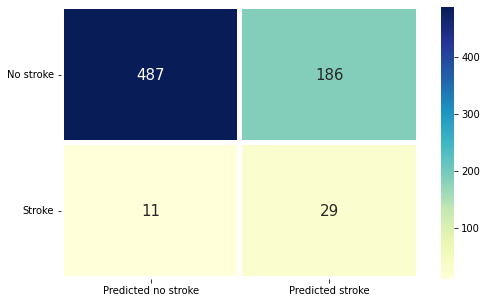

Accuracy Score:  0.7237026647966339

K-Fold Validation Mean Accuracy: 77.34 %

Standard Deviation: 1.24 %

ROC AUC Score: 0.72 %

Precision: 0.13 %

Recall: 0.72 %

F1 Score: 0.23 %

Cohen Score: 0.15 %

[[487 186]
 [ 11  29]]
----------------------------------------



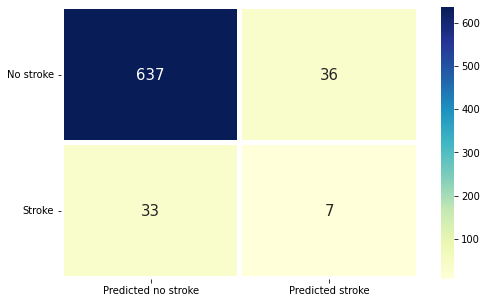

Accuracy Score:  0.9032258064516129

K-Fold Validation Mean Accuracy: 91.86 %

Standard Deviation: 2.60 %

ROC AUC Score: 0.56 %

Precision: 0.16 %

Recall: 0.17 %

F1 Score: 0.17 %

Cohen Score: 0.12 %

[[637  36]
 [ 33   7]]
----------------------------------------



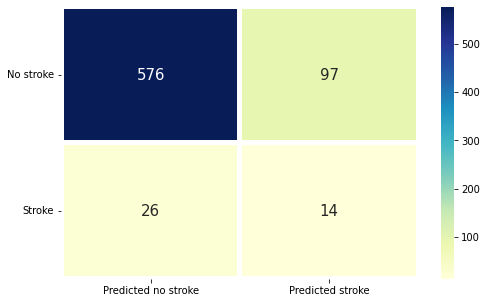

Accuracy Score:  0.8274894810659187

K-Fold Validation Mean Accuracy: 91.17 %

Standard Deviation: 0.83 %

ROC AUC Score: 0.60 %

Precision: 0.13 %

Recall: 0.35 %

F1 Score: 0.19 %

Cohen Score: 0.11 %

[[576  97]
 [ 26  14]]
----------------------------------------



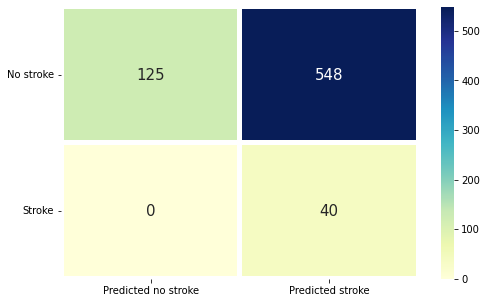

Accuracy Score:  0.2314165497896213

K-Fold Validation Mean Accuracy: 59.83 %

Standard Deviation: 1.38 %

ROC AUC Score: 0.59 %

Precision: 0.07 %

Recall: 1.00 %

F1 Score: 0.13 %

Cohen Score: 0.02 %

[[125 548]
 [  0  40]]
----------------------------------------



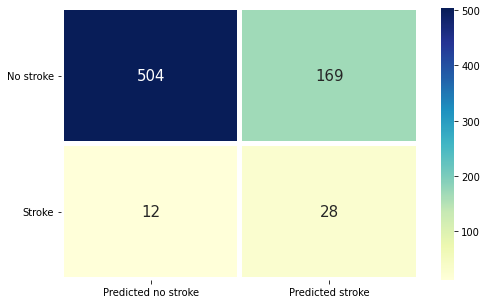

Accuracy Score:  0.7461430575035063

K-Fold Validation Mean Accuracy: 75.89 %

Standard Deviation: 0.55 %

ROC AUC Score: 0.72 %

Precision: 0.14 %

Recall: 0.70 %

F1 Score: 0.24 %

Cohen Score: 0.16 %

[[504 169]
 [ 12  28]]
----------------------------------------



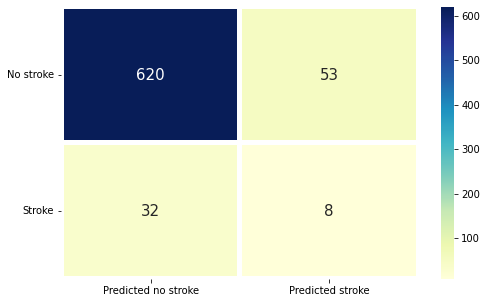

Accuracy Score:  0.8807854137447405

K-Fold Validation Mean Accuracy: 93.40 %

Standard Deviation: 3.36 %

ROC AUC Score: 0.56 %

Precision: 0.13 %

Recall: 0.20 %

F1 Score: 0.16 %

Cohen Score: 0.10 %

[[620  53]
 [ 32   8]]
----------------------------------------



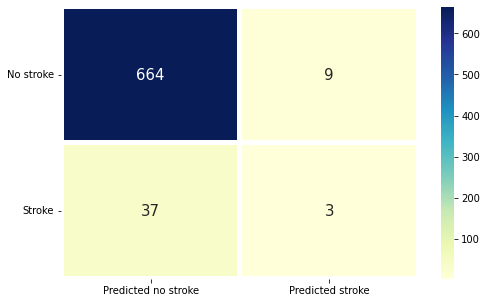

Accuracy Score:  0.9354838709677419

K-Fold Validation Mean Accuracy: 96.38 %

Standard Deviation: 5.40 %

ROC AUC Score: 0.53 %

Precision: 0.25 %

Recall: 0.07 %

F1 Score: 0.12 %

Cohen Score: 0.09 %

[[664   9]
 [ 37   3]]
----------------------------------------



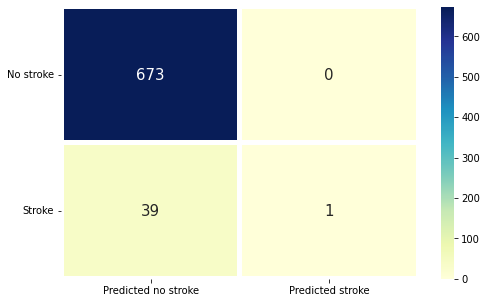

Accuracy Score:  0.9453015427769986

K-Fold Validation Mean Accuracy: 96.36 %

Standard Deviation: 5.71 %

ROC AUC Score: 0.51 %

Precision: 1.00 %

Recall: 0.03 %

F1 Score: 0.05 %

Cohen Score: 0.05 %

[[673   0]
 [ 39   1]]
----------------------------------------



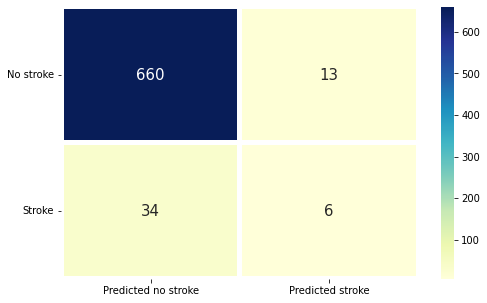

Accuracy Score:  0.9340813464235624

K-Fold Validation Mean Accuracy: 95.32 %

Standard Deviation: 5.84 %

ROC AUC Score: 0.57 %

Precision: 0.32 %

Recall: 0.15 %

F1 Score: 0.20 %

Cohen Score: 0.17 %

[[660  13]
 [ 34   6]]
----------------------------------------



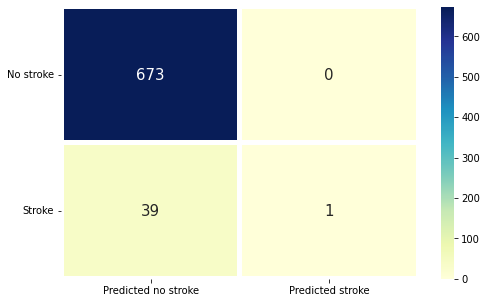

Accuracy Score:  0.9453015427769986

K-Fold Validation Mean Accuracy: 96.26 %

Standard Deviation: 5.71 %

ROC AUC Score: 0.51 %

Precision: 1.00 %

Recall: 0.03 %

F1 Score: 0.05 %

Cohen Score: 0.05 %

[[673   0]
 [ 39   1]]
----------------------------------------



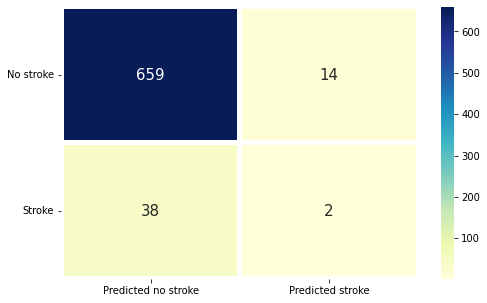

Accuracy Score:  0.9270687237026648

K-Fold Validation Mean Accuracy: 96.17 %

Standard Deviation: 5.38 %

ROC AUC Score: 0.51 %

Precision: 0.12 %

Recall: 0.05 %

F1 Score: 0.07 %

Cohen Score: 0.04 %

[[659  14]
 [ 38   2]]
----------------------------------------



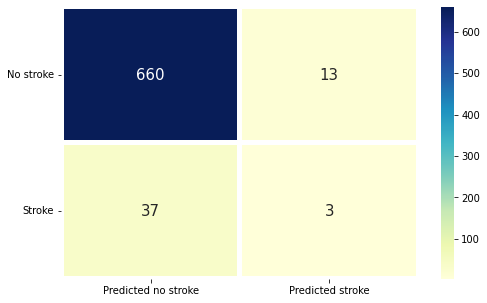

Accuracy Score:  0.9298737727910238

K-Fold Validation Mean Accuracy: 96.19 %

Standard Deviation: 5.49 %

ROC AUC Score: 0.53 %

Precision: 0.19 %

Recall: 0.07 %

F1 Score: 0.11 %

Cohen Score: 0.08 %

[[660  13]
 [ 37   3]]
----------------------------------------



In [ ]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    #############################
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'YlGnBu', annot = True, fmt = 'd', linewidths = 4, cbar = True, annot_kws = {'fontsize': 15}, 
    yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
    plt.yticks(rotation = 0)
    plt.show()
    #############################

    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 5) 
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    cohen_score = cohen_kappa_score(y_test, y_pred)

    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('')
    print(cm)
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_2.append(cohen_score)
    lst_1.append(lst_2)

In [ ]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score
7,XGBClassifier,94.530154,96.356877,5.709497,0.512500,1.000000,0.025,0.048780,0.046170
9,GradientBoostingClassifier,94.530154,96.263941,5.708287,0.512500,1.000000,0.025,0.048780,0.046170
6,RandomForest,93.548387,96.375465,5.396100,0.530814,0.250000,0.075,0.115385,0.091871
8,AdaBoostClassifier,93.408135,95.315985,5.842348,0.565342,0.315789,0.150,0.203390,0.173527
11,LGBMClassifier,92.987377,96.189591,5.485004,0.527842,0.187500,0.075,0.107143,0.077572
10,HistGradientBoostingClassifier,92.706872,96.171004,5.383087,0.514599,0.125000,0.050,0.071429,0.040675
1,SVM,90.322581,91.858736,2.599308,0.560754,0.162791,0.175,0.168675,0.117368
5,DecisionTree,88.078541,93.401487,3.360151,0.560624,0.131148,0.200,0.158416,0.097240
2,KNeigbors,82.748948,91.171004,0.831252,0.602935,0.126126,0.350,0.185430,0.112206
4,BernoulliNB,74.614306,75.892193,0.553267,0.724443,0.142132,0.700,0.236287,0.157733


Text(0.5, 1.0, 'Model Compare Graphic')

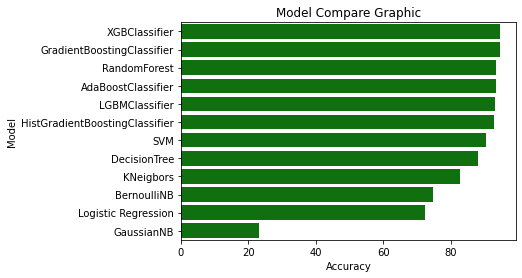

In [ ]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='g')
plt.title('Model Compare Graphic')